In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [28]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
x=df[['enginesize']]
y=df['price']

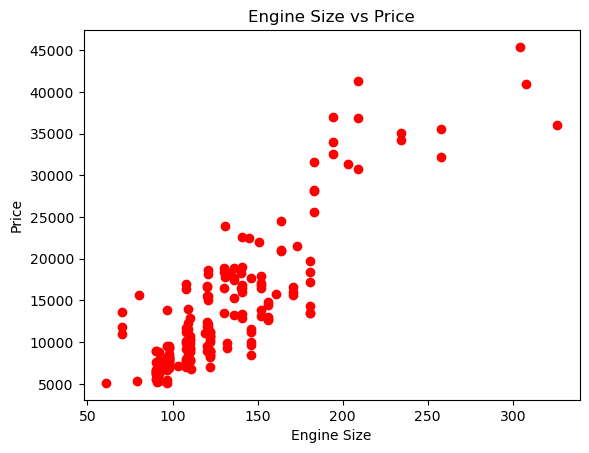

In [30]:
plt.scatter(x, y, color='red')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [31]:
poly=PolynomialFeatures(degree=4)
x_l=poly.fit_transform(x)
lin_reg=LinearRegression()
lin_reg.fit(x_l, y)
pr=lin_reg.predict(x_l)

In [32]:
model=LinearRegression()
model.fit(x,y)
pred=model.predict(x)


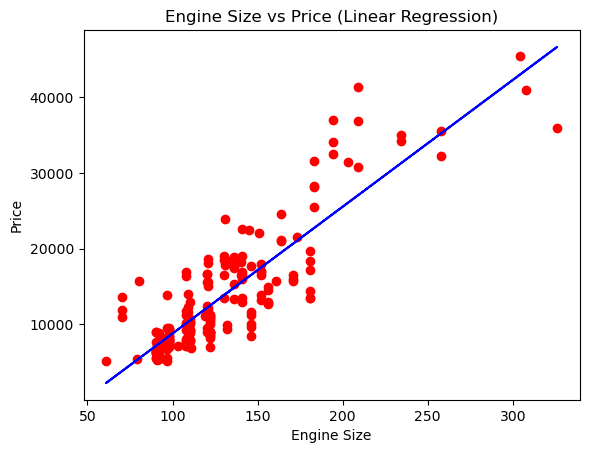

In [33]:
plt.scatter(x, y, color='red')
plt.plot(x, pred, color='blue')
plt.title('Engine Size vs Price (Linear Regression)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [34]:
X=[[200]]
lin_reg.predict(poly.fit_transform(X))

array([28205.13194914])

In [35]:
X_lin=[[200]]
model.predict(X_lin)

c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25534.23774749])

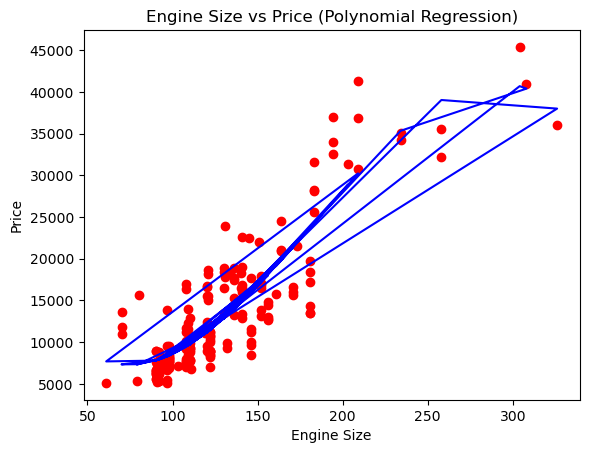

In [36]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(poly.fit_transform(x)), color='blue')
plt.title('Engine Size vs Price (Polynomial Regression)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

C:\Users\yashw\AppData\Local\Temp\ipykernel_4148\3359823152.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x.values),max(x.values), 0.1)


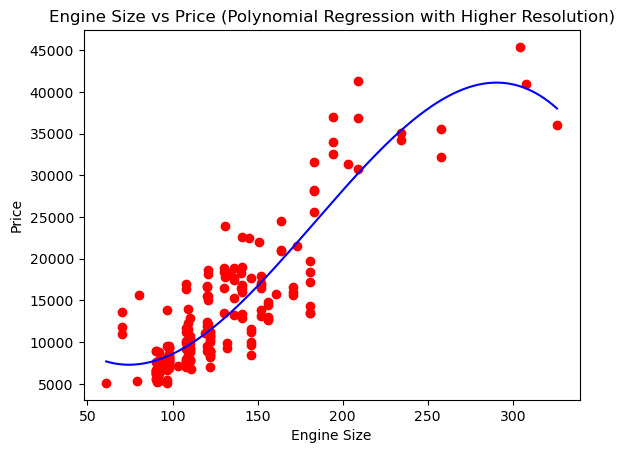

In [37]:
x_grid=np.arange(min(x.values),max(x.values), 0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x, y, color='red')
plt.plot(x_grid, lin_reg.predict(poly.fit_transform(x_grid)), color='blue')
plt.title('Engine Size vs Price (Polynomial Regression with Higher Resolution)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [38]:
msl=mean_squared_error(y, lin_reg.predict(x_l))
msp=mean_squared_error(y, pred)
r2l=r2_score(y, lin_reg.predict(x_l))
r2p=r2_score(y, pred)
print("R^2 for Linear Regression:", r2p)
print("R^2 for Polynomial Regression:", r2l)
print("Mean Squared Error for Linear Regression:", msp)
print("Mean Squared Error for Polynomial Regression:", msl)


R^2 for Linear Regression: 0.7641291357806176
R^2 for Polynomial Regression: 0.7938699575522645
Mean Squared Error for Linear Regression: 14980261.40555132
Mean Squared Error for Polynomial Regression: 13091408.850448111


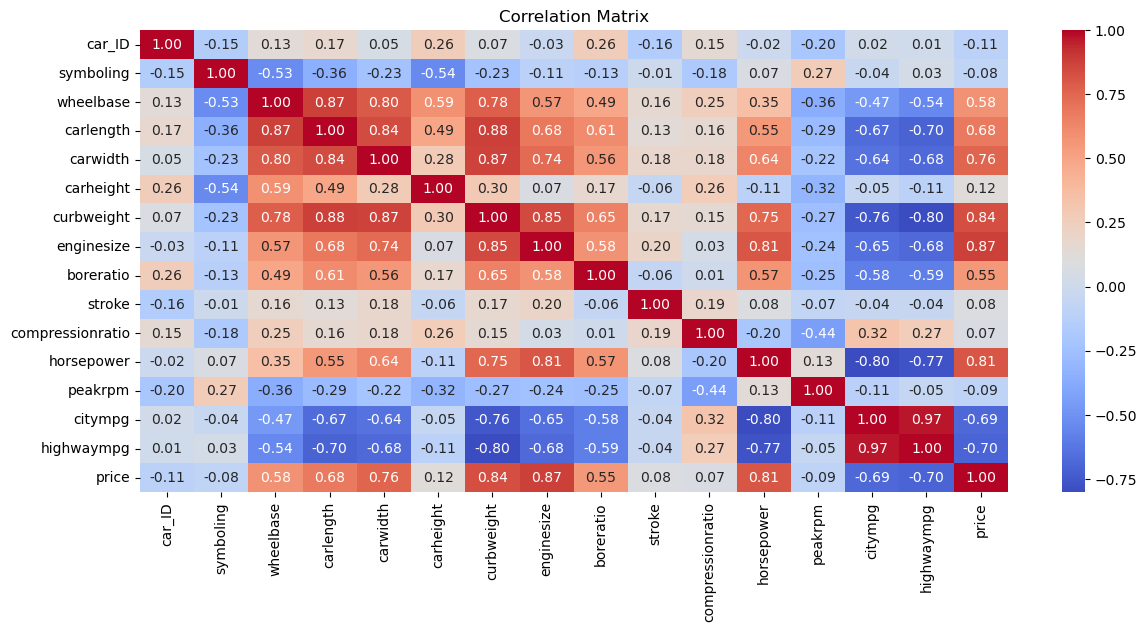

In [39]:
a = df.corr(numeric_only=True)
plt.figure(figsize=(14, 6))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
np.absolute(a["price"]).sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

In [41]:
for i,c in np.absolute(a["price"]).sort_values(ascending=False).items():
    if i!="price":
        if c>0.7:
            print(f"{i} has a strong correlation with price.which is {c}")
        elif c>0.3:
            print(f"{i} has a moderate correlation with price.which is {c}")
        else:
            print(f"{i} has a weak correlation with price.which is {c}")

enginesize has a strong correlation with price.which is 0.8741448025245117
curbweight has a strong correlation with price.which is 0.8353048793372975
horsepower has a strong correlation with price.which is 0.8081388225362214
carwidth has a strong correlation with price.which is 0.759325299741511
highwaympg has a moderate correlation with price.which is 0.6975990916465573
citympg has a moderate correlation with price.which is 0.68575133602704
carlength has a moderate correlation with price.which is 0.6829200156779629
wheelbase has a moderate correlation with price.which is 0.5778155982921489
boreratio has a moderate correlation with price.which is 0.5531732367984439
carheight has a weak correlation with price.which is 0.11933622657049496
car_ID has a weak correlation with price.which is 0.10909333948229938
peakrpm has a weak correlation with price.which is 0.0852671502778575
symboling has a weak correlation with price.which is 0.07997822464270359
stroke has a weak correlation with price

In [42]:
z=df.drop('price', axis=1)
z.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


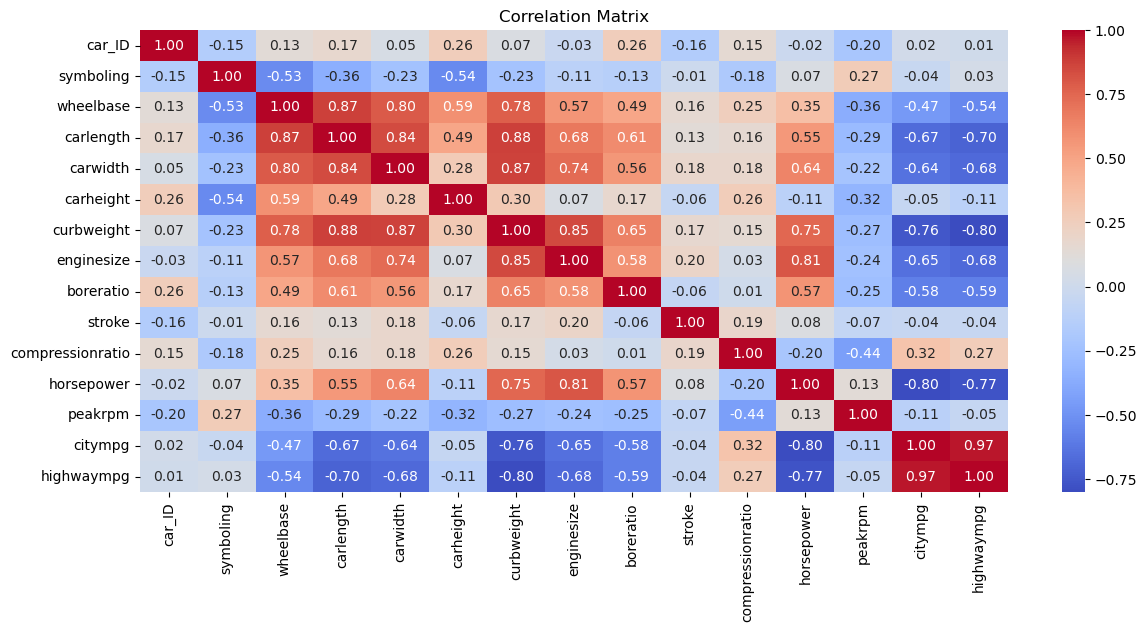

In [43]:
a = z.corr(numeric_only=True)
plt.figure(figsize=(14,6))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

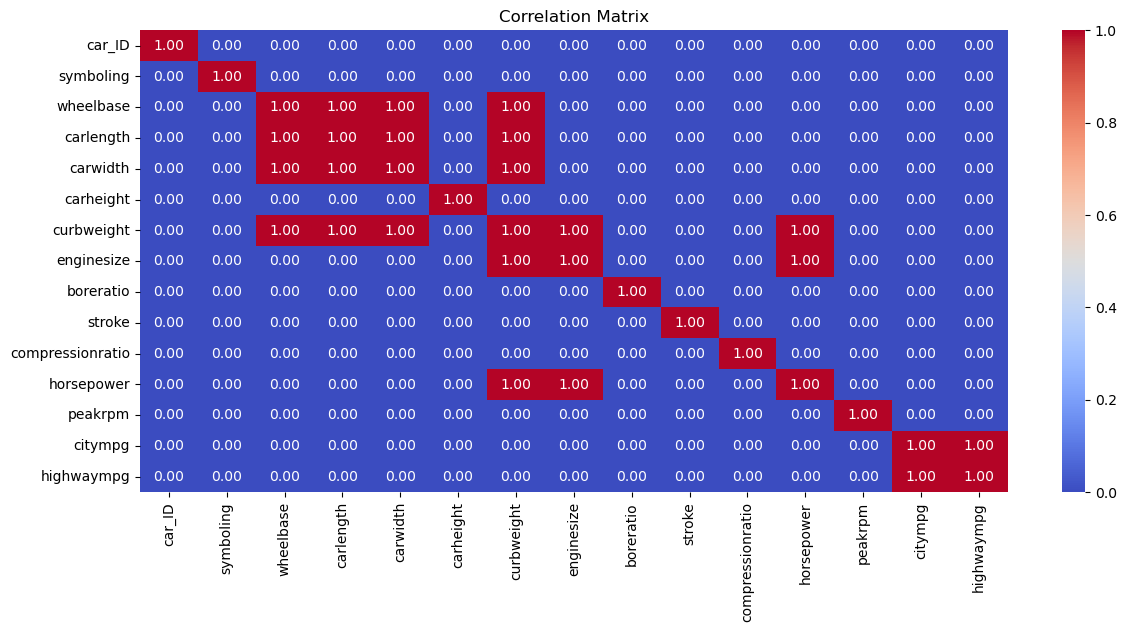

In [44]:
a= z.corr(numeric_only=True)>0.75
plt.figure(figsize=(14,6))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
corr = z.corr(numeric_only=True)
high_corr = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr.iloc[i, j]
        if val > 0.75:
            high_corr.append((f"{cols[i]} & {cols[j]}", val))
print("high positive correlation:")
for i, val in high_corr:
    print(i, ",", val)

high positive correlation:
wheelbase & carlength , 0.874587475964264
wheelbase & carwidth , 0.795143643616968
wheelbase & curbweight , 0.7763863277822105
carlength & carwidth , 0.8411182684818453
carlength & curbweight , 0.8777284608306433
carwidth & curbweight , 0.8670324646791233
curbweight & enginesize , 0.850594073426277
curbweight & horsepower , 0.7507392514434825
enginesize & horsepower , 0.8097686545377302
citympg & highwaympg , 0.9713370423425045
